In [1]:
import numpy as np
import pandas as pd
# from pandas import Series, DataFrame 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, validation_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from xgboost import XGBClassifier
import lightgbm as ltb
# from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
pd.set_option('display.width', 10000)

C:\Users\makif\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df=pd.read_csv("d_encoded_sirali.csv")

In [3]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,LEVEL,EXPERIENCE,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,POSITION_GAME DEVELOPER,POSITION_MOBILE APPLICATION DEVELOPER,...,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_£ - Sterlin,CURRENCY_€ - Euro,CURRENCY_₺ - Türk Lirası,SALARY_AVG_TL,POSITION_CTO
0,1,2,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,15499,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,8499,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,15499,0
3,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,10499,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,5499,0


In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(5026, 34)
##################### Types #####################
LEVEL                                      int64
EXPERIENCE                                 int64
POSITION_DATA SCIENTIST                    int64
POSITION_DATABASE ADMIN                    int64
POSITION_DEVOPS ENGINEER                   int64
POSITION_EMBEDDED SOFTWARE DEVELOPER       int64
POSITION_FRONT-END DEVELOPER               int64
POSITION_FULL STACK DEVELOPER              int64
POSITION_GAME DEVELOPER                    int64
POSITION_MOBILE APPLICATION DEVELOPER      int64
POSITION_OTHERS                            int64
POSITION_QA / TEST AUTOMATION DEVELOPER    int64
POSITION_SOFTWARE ARCHITECT                int64
POSITION_SOFTWARE DEVELOPMENT MANAGER      int64
POSITION_TEAM / TECH LEAD                  int64
GENDER_Kadın                               int64
COMPANY_Dijital / Reklam Ajansı            int64
COMPANY_E-Ticaret                          int64
COMPANY

In [5]:
#MODEL KURMA

In [6]:
#Bagımlı ve bagımsız degiskenlerimizi ayırıyoruz
y = df["SALARY_AVG_TL"]
X = df.drop(["SALARY_AVG_TL"], axis=1)

In [8]:
## Train verisi ile model kurup, model başarısını değerlendirelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [9]:
#MODELRMSE DEGERLERİNE BAKALIM
models = [('LR', LinearRegression()),
          #("Ridge", Ridge()),
          #("Lasso", Lasso()),
          #("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 17423.4942 (LR) 
RMSE: 21687.146 (KNN) 
RMSE: 22815.9956 (CART) 
RMSE: 18535.9301 (RF) 
RMSE: 17808.2128 (GBM) 
RMSE: 19959.2426 (XGBoost) 
RMSE: 18168.7534 (LightGBM) 


In [10]:
#veriler carpık oldugu icin log dönüşümü yapmamız gerekiyor

In [11]:
# Log dönüşümünün gerçekleştirilmesi
train_df = df[df['SALARY_AVG_TL'].notnull()]
test_df = df[df['SALARY_AVG_TL'].isnull()]

In [12]:
y = np.log1p(train_df['SALARY_AVG_TL'])
X = train_df.drop("SALARY_AVG_TL", axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)


In [15]:
lgbm = LGBMRegressor().fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
y_pred

array([ 9.11204   ,  8.90378226, 10.52262729, ...,  9.24154161,
       10.81130507, 11.21519531])

In [16]:
# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y = np.expm1(y_pred)
new_y

array([ 9062.766109  ,  7358.75751134, 37145.59138521, ...,
       10315.93095799, 49577.12927478, 74249.16703627])

In [18]:
new_y_test = np.expm1(y_test)
new_y_test

1343      7499.0
2952      5499.0
184      25499.0
1465     14499.0
1314    121085.0
          ...   
3481     27499.0
574      14499.0
720      10499.0
261     195605.0
2487     27935.0
Name: SALARY_AVG_TL, Length: 1257, dtype: float64

In [19]:
np.sqrt(mean_squared_error(new_y_test, new_y))

20146.95159178039

In [20]:
#hiperparametre optimizasyonu gercekleştirelim

In [21]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [23]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]}
               #"colsample_bytree": [0.5, 0.7, 1]

In [25]:
lgbm_gs_best = GridSearchCV(lgbm,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [26]:
lgbm_gs_best

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [500, 1500]},
             verbose=True)

In [28]:
final_model = lgbm.set_params(**lgbm_gs_best.best_params_).fit(X, y)

In [29]:
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

In [30]:
rmse

0.3674534951408748

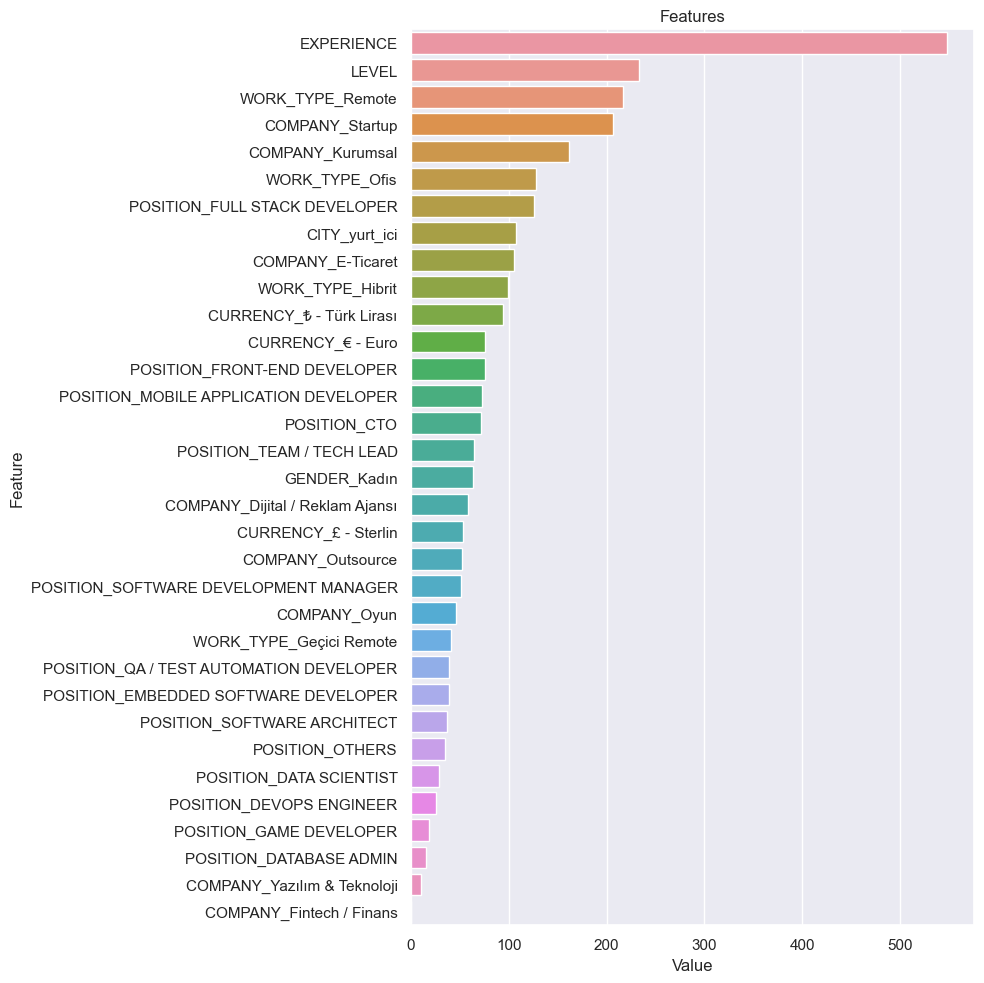

In [31]:
# Degiskenlerin önem düzeyini belirten feature importance
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

model = LGBMRegressor()
model.fit(X, y)

plot_importance(model, X)

In [33]:
# Tüm gözlem birimleri için tahmin işlemi yapıp sonuçları sakla
y_pred_all = final_model.predict(X)
y_pred_all
new_y_pred_all = np.expm1(y_pred_all)
new_y_pred_all

array([15065.15437249,  7279.92699211, 13254.05966607, ...,
        8155.04758628, 19271.60415674,  8362.80196908])

In [34]:
# X test birimleri için tahmin işlemi yapıp sonuçları sakla
y_pred_ = final_model.predict(X_test)
y_pred_
new_y_pred_=np.expm1(y_pred_)
new_y_pred_

array([ 9157.71321084,  7797.61911539, 36343.08041581, ...,
       10273.03540176, 61234.72460052, 51541.9740716 ])

In [37]:
n_y_test= np.expm1(y_test)

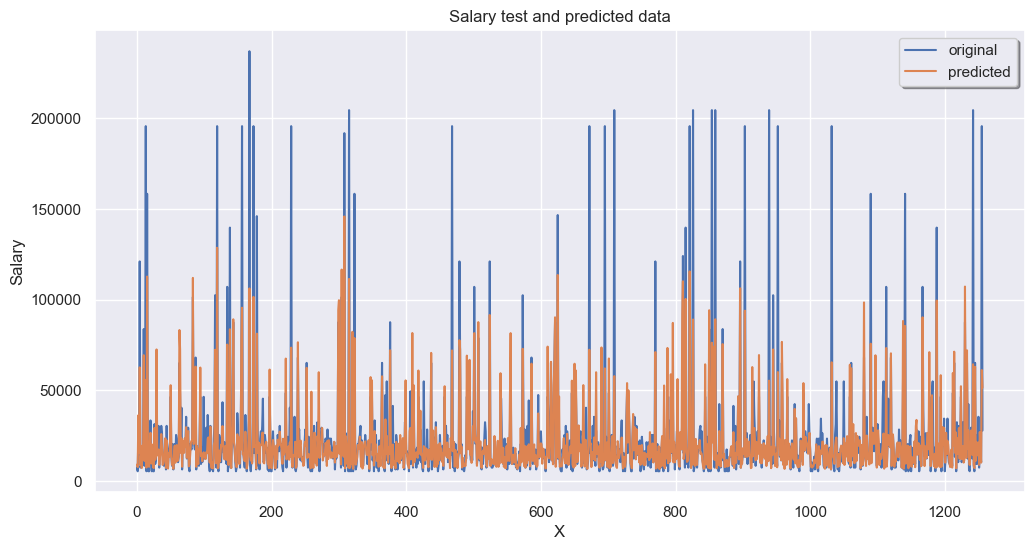

In [38]:
#BU GRAFİKTE Y_TEST'TEKİ DEGERLER VE BUNLARIN TAHMİNLERİ VAR
x_ax = range(len(n_y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, n_y_test, label="original")
plt.plot(x_ax, new_y_pred_, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('Salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [43]:
#gercek degerlerle tahmin edilen degerleri birlikte görelim
veri=np.array(n_y_test)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(new_y_pred_,columns = ["y_pred"])
dff.sample(20)

,y_test,y_pred
159,10499.0,12059.923482
189,11499.0,9857.932412
524,121085.0,91574.804663
319,7499.0,9667.685308
360,22499.0,19288.393182
175,26499.0,18983.303376
762,20499.0,27043.848442
988,17499.0,19338.207092
787,22499.0,24957.153198
473,20499.0,17214.002184


In [44]:
#Model dosyası olusturma

In [45]:
# Modeli dosya şeklinde diske kaydedelim
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

In [46]:
# Şimdi de bu dosyayı okuyalım
final_lgbm_model_from_disc = joblib.load("final_model.pkl")

In [47]:
random_user = X.sample(1, random_state=45) #veriden rastgele bir kullanıcı sectik
random_user

,LEVEL,EXPERIENCE,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,POSITION_GAME DEVELOPER,POSITION_MOBILE APPLICATION DEVELOPER,...,COMPANY_Yazılım & Teknoloji,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_£ - Sterlin,CURRENCY_€ - Euro,CURRENCY_₺ - Türk Lirası,POSITION_CTO
4768,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [51]:
final_lgbm_model_from_disc.predict(pd.DataFrame(random_user)) #modeli kullanarak tahmin et diyorum

array([9.52552155])